<a href="https://colab.research.google.com/github/aiaaee/Analyse_Simple_Image/blob/main/Image_Analyzing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import data, segmentation, color, filters, io , graph


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   2,   0],
        [  3,   6,   0],
        [  0,   1,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[104, 112,  71],
        [107, 115,  78],
        [  7,  12,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[108, 119,  63],
        [184, 194, 142],
        [164, 171, 129],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
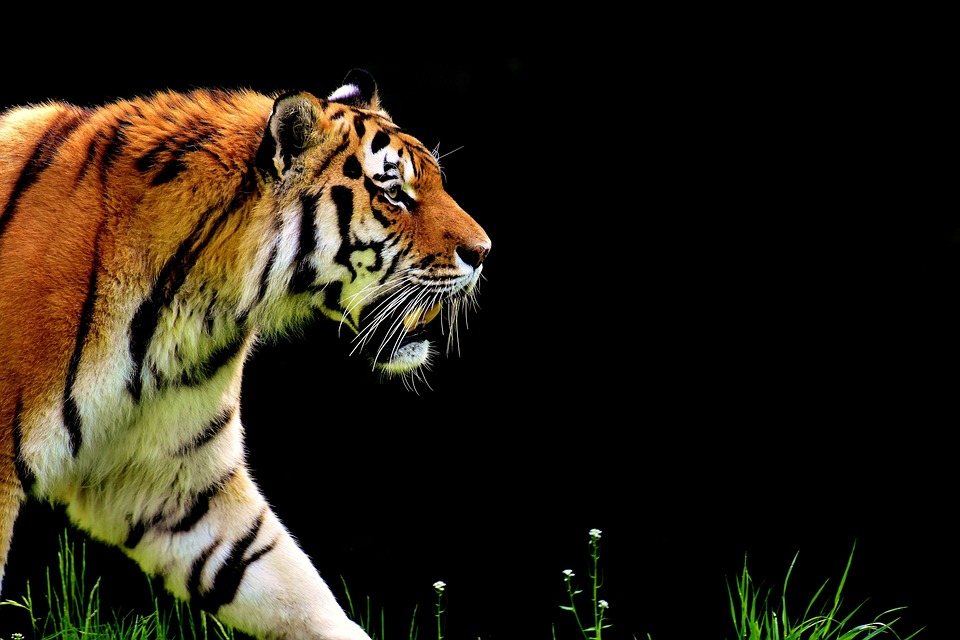

In [6]:
image = plt.imread('/content/tiger.jpg')
image

In [9]:
image.shape

(640, 960, 3)

In [25]:
image[: , 2 ,  :]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       ...,
       [  0,   1,   0],
       [  7,  12,   0],
       [164, 171, 129]], dtype=uint8)

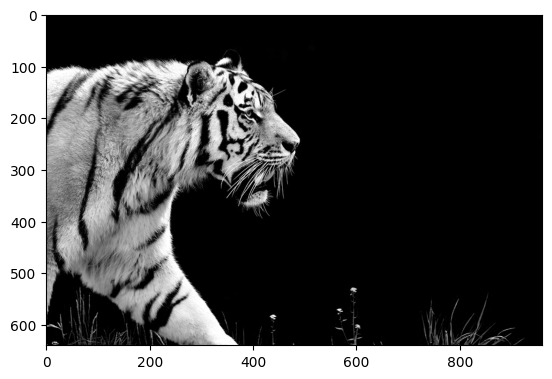

In [27]:
plt.imshow(image[: , : , 0] , cmap='gray')

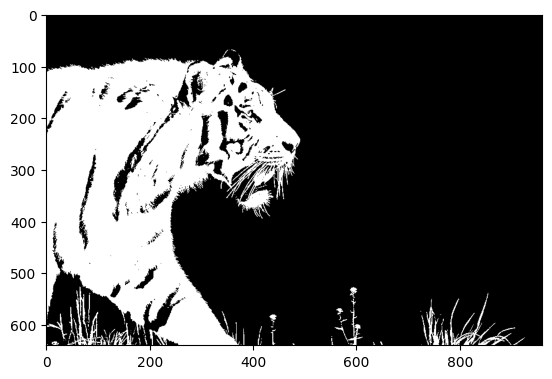

In [29]:
image_nuclie = image[: , : , 0]
mask_body = image_nuclie > 20
plt.imshow(mask_body , cmap='gray')

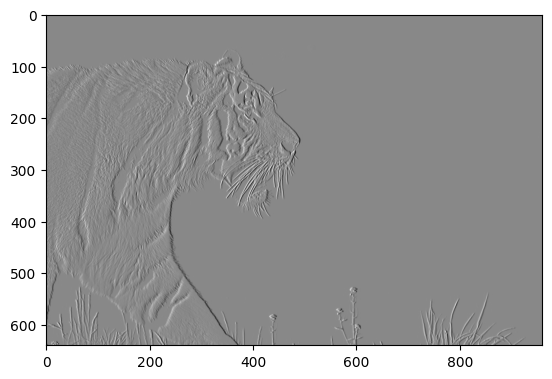

In [41]:
img = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
xSobel = cv2.Sobel(src=img , ddepth=cv2.CV_64F , dx=1, dy=0 , ksize=3)
plt.imshow(xSobel , cmap='gray')

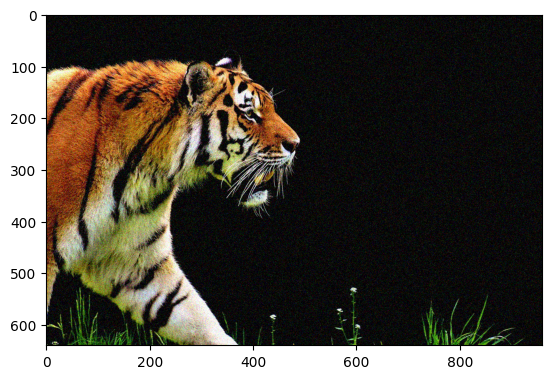

In [35]:
# Function to add random noise of various types to a floating-point image.
image1 = skimage.util.random_noise(image , mode="gaussian" , rng=None , clip=True )
plt.imshow(image1)

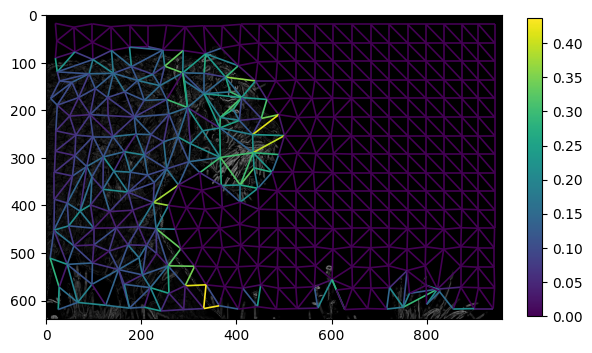

In [39]:
gimg = color.rgb2gray(image)

labels = segmentation.slic(image, compactness=30, n_segments=400, start_label=1)
edges = filters.sobel(gimg)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)
lc = graph.show_rag(
    labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis', edge_width=1.2
)

plt.colorbar(lc, fraction=0.03)
io.show()